# Estudiantes:  
* Laura Julieth Carretero Serrano - 202214922  
* Juan David Rios Nisperuza - 202215787

# Problema 1: Asignación de Tareas en un Equipo de Desarrollo Ágil

In [86]:
from pyomo.environ import *
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

Conjuntos:
$$T = \{T_1, T_2, \dots, T_{11}\}$$

Parámetros:
- **Prioridad de cada tarea**:
  $$P_i = \text{Prioridad de la tarea }_i, \ \forall i \in T$$
  
- **Puntos de historia de cada tarea**:
  $$H_i = \text{Puntos de historia de la tarea }_i, \ \forall i \in T$$
  

Variables de Decisión:
$$X_i = \begin{cases} 
1 & \text{si la tarea } i \text{ es seleccionada} \\
0 & \text{en caso contrario}
\end{cases}, \ \forall i \in T$$

Función Objetivo:
$$\text{Maximizar} \quad \sum_{i \in T} P_i \times X_i$$

Restricciones:
$$\sum_{i \in T} H_i \times X_i \leq 13*\text{Numero de trabajadores}

In [87]:
numTask = 11

p = RangeSet(1,numTask)

# M = M
M = ConcreteModel()

priority_names = {
    7: 'Maxima',
    6: 'Alta',
    5: 'Media Alta',
    4: 'Media',
    3: 'Media Baja',
    2: 'Baja',
    1: 'Minima'
}

pH= [5, 3, 13, 1, 21, 2, 2, 5, 8, 13, 21]

pri= [7, 5, 6, 3, 1, 4, 6, 6, 2, 7, 6]

M.x = Var(p, domain=Binary)

M.obj = Objective(expr = sum(M.x[i] * pri[i-1] for i in p), sense = maximize)

M.res1 = Constraint(expr = sum(M.x[i] * pH[i-1] for i in p) <= 13*4)


SolverFactory('glpk').solve(M)

M.display()

Model unknown

  Variables:
    x : Size=11, Index=[1:11]
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   1.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  46.0

  Constraints:
    res1 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 

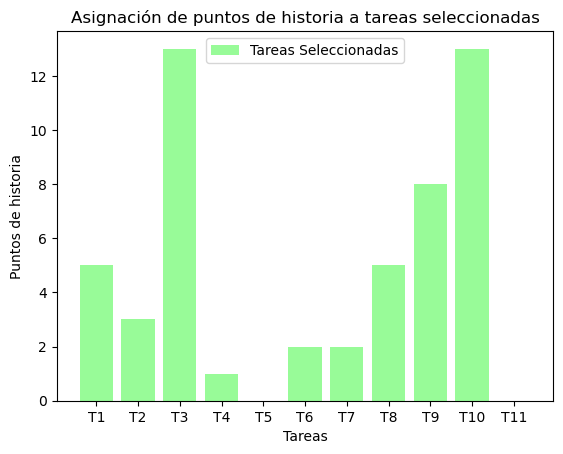

In [88]:
tasks = list(p)
story_points = [pH[t-1] for t in p]

selected = [M.x[t]() for t in p]  # Task selection status (0 or 1)

# Creating a stacked bar chart
plt.bar(tasks, [sp * sel for sp, sel in zip(story_points, selected)], color= 'palegreen', label='Tareas Seleccionadas')

plt.xlabel("Tareas")
plt.ylabel("Puntos de historia")
plt.title("Asignación de puntos de historia a tareas seleccionadas")

# Adding labels
plt.xticks(tasks, [f"T{i}" for i in tasks])
plt.legend()

plt.show()

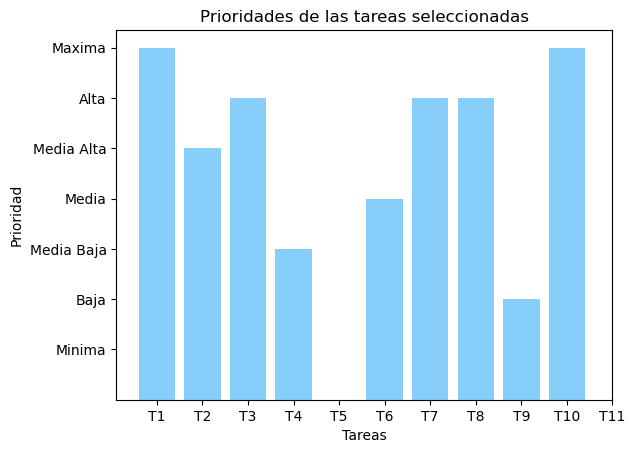

In [89]:
selected_tasks = [i for i in p if M.x[i].value == 1]
selected_priorities = [pri[i-1] for i in selected_tasks]
selected_priority_names = [priority_names[priority] for priority in selected_priorities]

# Plotting the priorities of the selected tasks
plt.bar(selected_tasks, selected_priorities, color='lightskyblue')
plt.xlabel('Tareas')
plt.ylabel('Prioridad')
plt.title('Prioridades de las tareas seleccionadas')
plt.yticks(ticks=range(1, 8), labels=[priority_names[i] for i in range(1, 8)])
plt.xticks(tasks, [f"T{i}" for i in tasks])
plt.show()

## **Analisis de Resultados**

Al analizar el resultado del problema 1, observamos que las tareas seleccionadas fueron la 1, 2, 3, 4, 6, 7, 8, 9 y 10, sumando un total de 51 puntos de historia, muy cerca del máximo posible de 52 puntos. Este límite se calculó considerando que cada empleado tiene 13 puntos de historia disponibles, y nuestro equipo está conformado por 4 desarrolladores.

Los resultados también muestran que se priorizaron adecuadamente todas las tareas con mayor prioridad, dejando fuera las tareas 5 y 11 por dos razones. Primero, la tarea 5, a pesar de tener un PH de 21, fue excluida por tener la prioridad mínima, lo cual evidencia que la restricción de prioridad se aplicó correctamente. Por otro lado, la tarea 11, aunque tenía una prioridad alta, probablemente no fue seleccionada debido a la gran cantidad de puntos de historia que requería, lo que podría haber impedido la inclusión de otras tareas con igual o mayor prioridad.


# Problema 2: Asignación de Trabajos a Trabajadores

Conjuntos:
- **Trabajos**:  
  $$T = \{T_1, T_2, \dots, T_{5}\}$$  
  Representa el conjunto de trabajos disponibles.  
  
- **Trabajadores**:  
  $$W = \{W_1, W_2, W_3\}$$  
  Representa el conjunto de trabajadores disponibles.

Parámetros:
- **Tiempo disponible de cada trabajador**:  
  $$\text{tiempo\_trabajador}_j, \ \forall j \in W$$  

- **Ganancia de cada trabajo**:  
  $$\text{ganancia}_i, \ \forall i \in T$$  

- **Tiempo requerido por cada trabajo**:  
  $$\text{tiempo\_trabajo}_i, \ \forall i \in T$$  
  
Variables de Decisión:
$$X_{ij} = \begin{cases} 
1 & \text{si el trabajo } i \text{ es asignado al trabajador } j \\
0 & \text{en caso contrario}
\end{cases}, \ \forall i \in T, \ \forall j \in W$$

Función Objetivo:
Maximizar la ganancia total de los trabajos asignados a los trabajadores:
$$\text{Maximizar} \quad \sum_{i \in T} \sum_{j \in W} \text{ganancia}_i \times X_{ij}$$

Restricciones:
1. **Restricción de asignación de trabajo**:  
   Cada trabajo puede ser asignado maximo a un trabajador:
   $$\sum_{j \in W} X_{ij} \leq 1, \ \forall i \in T$$

2. **Restricción de tiempo de los trabajadores**:  
   El tiempo total de los trabajos asignados a cada trabajador no debe exceder su tiempo disponible:
   $$\sum_{i \in T} \text{tiempo\_trabajo}_i \times X_{ij} \leq \text{tiempo\_trabajador}_j, \ \forall j \in W$$


In [90]:
# Datos del problema
numTrabajos = 5
numTrabajadores = 3

trabajadores_tiempo = [8, 10, 6] 
ganancias_trabajos = [50, 60, 40, 70, 30]  
tiempo_trabajos = [4, 5, 3, 6, 2]  


M = ConcreteModel()


M.T = RangeSet(1, numTrabajos)  
M.W = RangeSet(1, numTrabajadores)  


M.x = Var(M.T, M.W, domain=Binary)  

M.obj = Objective(expr=sum(M.x[i, j] * ganancias_trabajos[i - 1] for i in M.T for j in M.W), sense=maximize)

# Restricciones

def asignar_un_trabajo_a_un_trabajador(M, i):
    return sum(M.x[i, j] for j in M.W) <= 1

M.asignacion_trabajos = Constraint(M.T, rule=asignar_un_trabajo_a_un_trabajador)

def tiempo_trabajador(M, j):
    return sum(M.x[i, j] * tiempo_trabajos[i-1] for i in M.T) <= trabajadores_tiempo[j-1]

M.tiempo_restriccion = Constraint(M.W, rule=tiempo_trabajador)


# Solver
SolverFactory('glpk').solve(M)
M.display()

Model unknown

  Variables:
    x : Size=15, Index=T*W
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   1.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (4, 1) :     0 :   0.0 :     1 : False : False : Binary
        (4, 2) :     0 :   0.0 :     1 : False : False : Binary
        (4, 3) :     0 :   1.0 :     1 : False : False : Binary
        (5, 1) :     0 :   1.0 :     1 : False : False : Binary
        (5, 2) :     0 :   0.0 :     1 : False : 

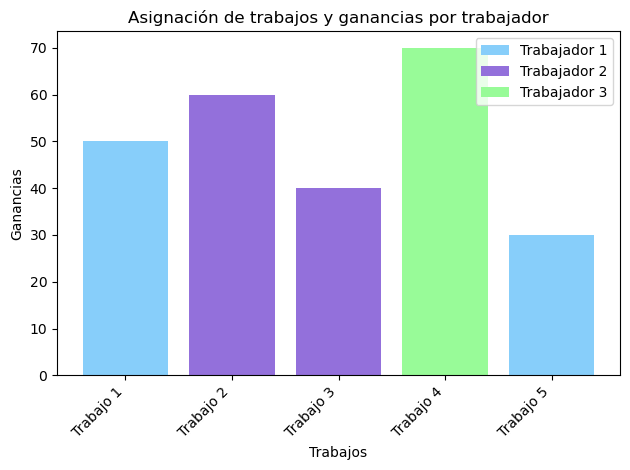

In [91]:
# Resultados
asignaciones = {i: None for i in M.T}
for i in M.T:
    for j in M.W:
        if value(M.x[i, j]) > 0.5:
            asignaciones[i] = j

# Crear gráfico de barras
fig, ax = plt.subplots()

# Colores para cada trabajador
colors = ['lightskyblue', 'mediumpurple', 'palegreen']

# Conjunto para rastrear qué trabajadores ya se han añadido a la leyenda
trabajadores_en_leyenda = set()

# Crear las barras
for i in M.T:
    trabajador = asignaciones[i]
    label = f'Trabajador {trabajador}' if trabajador not in trabajadores_en_leyenda else ""
    ax.bar(i, ganancias_trabajos[i - 1], color=colors[trabajador - 1], label=label)
    trabajadores_en_leyenda.add(trabajador)

# Nombres de los trabajos
nombresTrabajos = [f'Trabajo {i}' for i in M.T]

# Configurar etiquetas y título
ax.set_xlabel('Trabajos')
ax.set_ylabel('Ganancias')
ax.set_title('Asignación de trabajos y ganancias por trabajador')
ax.set_xticks(range(1, numTrabajos + 1))
ax.set_xticklabels(nombresTrabajos, rotation=45, ha='right')

# Añadir leyenda
ax.legend()

# Ajustar el espaciado para que las etiquetas no se amontonen
plt.tight_layout()

plt.show()

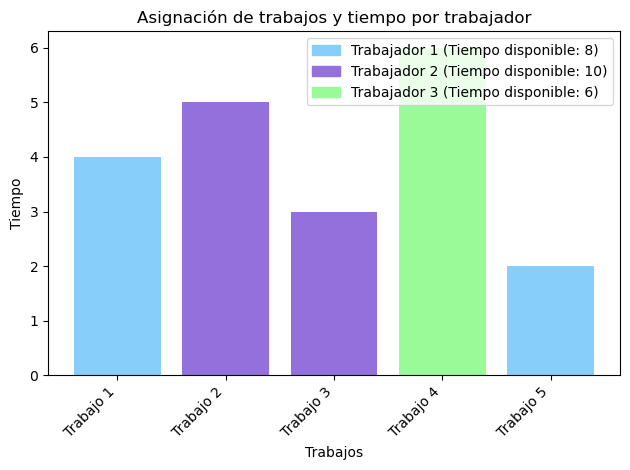

In [92]:
# Crear gráfico de barras
fig, ax = plt.subplots()

# Colores para cada trabajador
colors = ['lightskyblue', 'mediumpurple', 'palegreen']

# Conjunto para rastrear qué trabajadores ya se han añadido a la leyenda
trabajadores_en_leyenda = set()

# Crear las barras
for i in M.T:
    trabajador = asignaciones[i]
    label = f'Trabajador {trabajador}' if trabajador not in trabajadores_en_leyenda else ""
    ax.bar(i, tiempo_trabajos[i - 1], color=colors[trabajador - 1], label=label)
    trabajadores_en_leyenda.add(trabajador)

# Nombres de los trabajos
nombresTrabajos = [f'Trabajo {i}' for i in M.T]

# Configurar etiquetas y título
ax.set_xlabel('Trabajos')
ax.set_ylabel('Tiempo')
ax.set_title('Asignación de trabajos y tiempo por trabajador')
ax.set_xticks(range(1, numTrabajos + 1))
ax.set_xticklabels(nombresTrabajos, rotation=45, ha='right')

# Añadir leyenda
# Añadir leyenda con tiempo disponible
handles = [plt.Rectangle((0,0),1,1, color=colors[j-1]) for j in range(1, len(colors) + 1)]
labels = [f'Trabajador {j} (Tiempo disponible: {trabajadores_tiempo[j-1]})' for j in range(1, len(trabajadores_tiempo) + 1)]
ax.legend(handles, labels)

# Ajustar el espaciado para que las etiquetas no se amontonen
plt.tight_layout()

plt.show()

## **Análisis de Resultados**

Al analizar los datos del problema y la asignación realizada, podemos concluir que la distribución del tiempo y la selección de trabajos fueron efectivas para optimizar las ganancias de cada trabajador dentro de sus límites de tiempo disponible.

Con tiempos disponibles de 8 horas para el Trabajador 1, 10 horas para el Trabajador 2 y 6 horas para el Trabajador 3, se seleccionaron combinaciones de trabajos que maximizan las ganancias sin exceder las horas asignadas. Los resultados obtenidos son:

- El Trabajador 1 obtuvo una ganancia de 80 USD utilizando 6 horas, con 2 horas no utilizadas.
- El Trabajador 2 logró una ganancia de 100 USD en 8 horas, con 2 horas disponibles sin usar.
- El Trabajador 3 alcanzó una ganancia de 70 USD usando las 6 horas completas, sin tiempo desaprovechado.

Las tareas asignadas permitieron a cada trabajador aprovechar su tiempo de manera óptima, minimizando tiempos no utilizados y maximizando las ganancias económicas.

La selección refleja un enfoque estratégico en la asignación, priorizando trabajos con alta ganancia en relación al tiempo requerido, asegurando que las tareas más lucrativas se realicen sin desperdiciar tiempo.

# Problema 3: Problema Complejo de Misión Humanitaria en Zambia

Conjuntos:
- **Aviones**:  
  $$A = \{A_1, A_2, A_3\}$$  
  Representa el conjunto de aviones disponibles.

- **Recursos**:  
  $$R = \{R_1, R_2, R_3, R_4, R_5\}$$  
  Representa el conjunto de recursos a transportar.

Parámetros:
- **Capacidad de peso de cada avión**:  
  $$\text{capacidadP}_j, \ \forall j \in A$$  

- **Capacidad de volumen de cada avión**:  
  $$\text{capacidadV}_j, \ \forall j \in A$$  

- **Valor de cada recurso**:  
  $$\text{valor}_i, \ \forall i \in R$$  

- **Peso de cada recurso**:  
  $$\text{peso}_i, \ \forall i \in R$$  

- **Volumen de cada recurso**:  
  $$\text{volumen}_i, \ \forall i \in R$$  

Variables de Decisión:
$$X_{ij} = \begin{cases} 
1 & \text{si el recurso } i \text{ es asignado al avión } j \\
0 & \text{en caso contrario}
\end{cases}, \ \forall i \in R, \ \forall j \in A$$

Función Objetivo:  
  
Maximizar el valor total de los recursos asignados a los aviones:
$$\text{Maximizar} \quad \sum_{i \in R} \sum_{j \in A} \text{valor}_i \times X_{ij}$$

Restricciones:
1. **Restricción de capacidad de peso**:  
   El peso total de los recursos asignados a cada avión no debe exceder su capacidad de peso:
   $$\sum_{i \in R} \text{peso}_i \times X_{ij} \leq \text{capacidadP}_j, \ \forall j \in A$$

2. **Restricción de capacidad de volumen**:  
   El volumen total de los recursos asignados a cada avión no debe exceder su capacidad de volumen:
   $$\sum_{i \in R} \text{volumen}_i \times X_{ij} \leq \text{capacidadV}_j, \ \forall j \in A$$

3. **Restricción de asignación de recursos**:  
   Cada recurso puede ser asignado maximo a un avión:
   $$\sum_{j \in A} X_{ij} \leq 1, \ \forall i \in R$$

4. **Restricción de no transportar medicinas en el avión 1**:  
   No se pueden asignar medicinas al avión 1:
   $$X_{2,1} = 0$$

5. **Restricción de no transportar equipo médico y agua en el mismo avión**:  
   No se puede asignar equipo médico y agua al mismo avión:
   $$X_{3,i} + X_{4,i} \leq 1, \ \forall i \in A$$

In [93]:
# Datos del problema
numAviones = 3
numRecursos = 5

capacidadPAviones = [30,40,50]
capacidadVAviones = [25,30,35]

valorRecursos = [50, 100, 120, 60, 40]
pesoRecursos = [15 , 5, 20, 18, 10]
volumenRecursos = [8, 2, 10 , 12, 6]

# Crear un modelo concreto
M = ConcreteModel()

# Conjuntos

M.A = RangeSet(1, numAviones)  # Aviones
M.R = RangeSet(1, numRecursos)  # Recursos

# Variables
M.x = Var(M.R, M.A, domain=Binary) 

M.obj = Objective(expr = sum(M.x[i,j] * valorRecursos[i - 1] for i in M.R for j in M.A), sense=maximize)

# Restricciones

def capacidad_peso(M, j):
    return sum(M.x[i,j] * pesoRecursos[i-1] for i in M.R) <= capacidadPAviones[j-1]

M.capacidad_peso = Constraint(M.A, rule=capacidad_peso)

def capacidad_volumen(M, j):
    return sum(M.x[i,j] * volumenRecursos[i-1] for i in M.R) <= capacidadVAviones[j-1]

M.capacidad_volumen = Constraint(M.A, rule=capacidad_volumen)

def asignar_recurso_a_avion(M, i):
    return sum(M.x[i, j] for j in M.A) <= 1

M.asignacion_recursos = Constraint(M.R, rule=asignar_recurso_a_avion)

def NoMedicinasAvion1(M):
    return M.x[2,1] == 0

M.NoMedicinasAvion1 = Constraint(rule=NoMedicinasAvion1)

def NoEquipoMedicoYAguaEnMismoAvion(M, i):
    return M.x[3,i] + M.x[4,i] <= 1

M.NoEquipoMedicoYAguaEnMismoAvion = Constraint(M.A, rule=NoEquipoMedicoYAguaEnMismoAvion)

# Solver
SolverFactory('glpk').solve(M)
M.display()

Model unknown

  Variables:
    x : Size=15, Index=R*A
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   1.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   1.0 :     1 : False : False : Binary
        (2, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   1.0 :     1 : False : False : Binary
        (4, 1) :     0 :   0.0 :     1 : False : False : Binary
        (4, 2) :     0 :   1.0 :     1 : False : False : Binary
        (4, 3) :     0 :   0.0 :     1 : False : False : Binary
        (5, 1) :     0 :   0.0 :     1 : False : False : Binary
        (5, 2) :     0 :   1.0 :     1 : False : 

In [94]:
# Resultados
asignaciones = {i: None for i in M.R}
for i in M.R:
    for j in M.A:
        if value(M.x[i, j]) > 0.5:
            asignaciones[i] = j

# Crear gráfico de barras
fig, ax = plt.subplots()

# Colores para cada avión
colors = ['lightskyblue', 'mediumpurple', 'palegreen']

# Conjunto para rastrear qué aviones ya se han añadido a la leyenda
aviones_en_leyenda = set()

# Crear las barras
for i in M.R:
    avion = asignaciones[i]
    label = f'Avión {avion}' if avion not in aviones_en_leyenda else ""
    ax.bar(i, valorRecursos[i - 1], color=colors[avion - 1], label=label)
    aviones_en_leyenda.add(avion)

# Nombres de los recursos
nombresRecursos = ["Alimentos Básicos", "Medicinas", "Equipos Médicos", "Agua Potable", "Mantas"]

# Configurar etiquetas y título
ax.set_xlabel('Recursos')
ax.set_ylabel('Valor de los Recursos')
ax.set_title('Asignación de recursos a los aviones')
ax.set_xticks(range(1, numRecursos + 1))
ax.set_xticklabels(nombresRecursos, rotation=45, ha='right')

# Añadir leyenda
ax.legend()

# Ajustar el espaciado para que las etiquetas no se amontonen
plt.tight_layout()

plt.show()

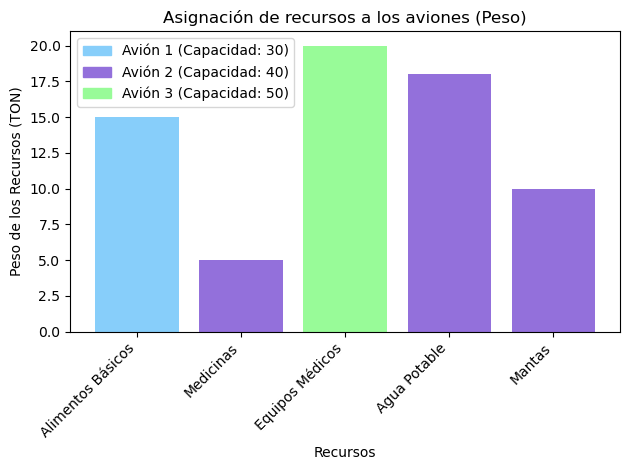

In [ ]:
fig, ax = plt.subplots()

# Colores para cada avión
colors = ['lightskyblue', 'mediumpurple', 'palegreen']

# Crear las barras
for i in M.R:
    avion = asignaciones[i]
    ax.bar(i, pesoRecursos[i - 1], color=colors[avion - 1])

# Nombres de los recursos
nombresRecursos = ["Alimentos Básicos", "Medicinas", "Equipos Médicos", "Agua Potable", "Mantas"]

# Configurar etiquetas y título
ax.set_xlabel('Recursos')
ax.set_ylabel('Peso de los Recursos (TON)')
ax.set_title('Asignación de recursos a los aviones (Peso)')
ax.set_xticks(range(1, numRecursos + 1))
ax.set_xticklabels(nombresRecursos, rotation=45, ha='right')

# Añadir leyenda con capacidad de peso y volumen
handles = [plt.Rectangle((0,0),1,1, color=colors[j-1]) for j in M.A]
labels = [f'Avión {j} (Capacidad: {capacidadPAviones[j-1]})' for j in M.A]
ax.legend(handles, labels)

# Ajustar el espaciado para que las etiquetas no se amontonen
plt.tight_layout()

plt.show()

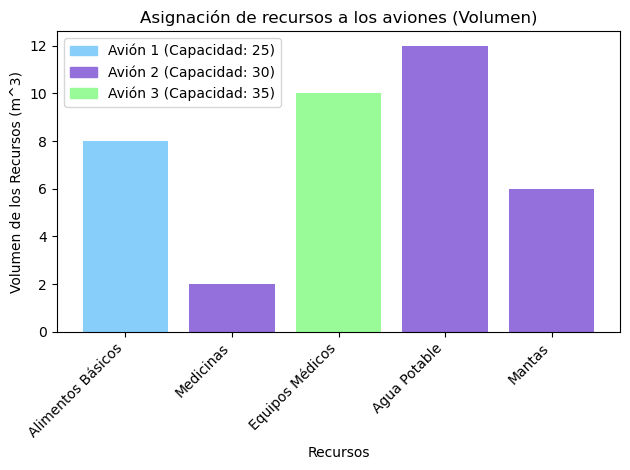

In [ ]:
# Crear gráfico de barras para el volumen
fig, ax = plt.subplots()

# Crear las barras
for i in M.R:
    avion = asignaciones[i]
    ax.bar(i, volumenRecursos[i - 1], color=colors[avion - 1])

# Nombres de los recursos
nombresRecursos = ["Alimentos Básicos", "Medicinas", "Equipos Médicos", "Agua Potable", "Mantas"]

# Configurar etiquetas y título
ax.set_xlabel('Recursos')
ax.set_ylabel('Volumen de los Recursos (m^3)')
ax.set_title('Asignación de recursos a los aviones (Volumen)')
ax.set_xticks(range(1, numRecursos + 1))
ax.set_xticklabels(nombresRecursos, rotation=45, ha='right')

# Añadir leyenda con capacidad de peso y volumen
handles = [plt.Rectangle((0,0),1,1, color=colors[j-1]) for j in M.A]
labels = [f'Avión {j} (Capacidad: {capacidadVAviones[j-1]})' for j in M.A]
ax.legend(handles, labels)

# Ajustar el espaciado para que las etiquetas no se amontonen
plt.tight_layout()

plt.show()

## **Casos para Analizar**

### ¿Qué impacto tiene las restricciones de almacenamiento de recursos?  

- **Seguridad de Medicamentos:** Si no se cumple con la restricción de no transportar medicamentos en el Avión 1, la temperatura inadecuada podría comprometer la efectividad de los medicamentos, haciéndolos inservibles y poniendo en riesgo la salud de los pacientes. Esto podría resultar en pérdidas económicas significativas debido al desperdicio de medicamentos y en consecuencias adversas para la salud de los pacientes que los necesiten.

- **Compatibilidad de Equipos Médicos y Agua Potable:** No respetar la restricción de no transportar equipos médicos junto con agua potable podría causar daños a los equipos médicos si se produce un derrame. La contaminación cruzada entre el agua y los equipos médicos podría comprometer la esterilidad y funcionalidad de estos equipos, lo que no solo representa un riesgo para los pacientes, sino también implica costos adicionales para la reparación o reemplazo de los equipos dañados.

### ¿Qué pasa si no tengo en cuenta la restricción volumetrica?  

No considerar la restricción volumétrica puede resultar en una sobrecarga de los aviones, lo cual afecta la eficiencia y la seguridad del transporte. Exceder la capacidad volumétrica puede llevar a la necesidad de realizar más viajes o a la redistribución de la carga, lo cual incrementa los costos operativos y el tiempo de entrega. En el peor de los casos, podría poner en peligro la integridad estructural de los aviones, comprometiendo la seguridad de la carga y de la tripulación.

## **Análisis de Resultados**

El objetivo del problema 3 es maximizar la importancia total de los recursos transportados, respetando las limitaciones de los aviones y las restricciones logísticas y de seguridad. Los resultados obtenidos confirman que se han respetado todas las restricciones y se ha logrado una asignación eficiente.

**Maximización del Valor:**

La asignación seleccionada permite maximizar la importancia total de los recursos transportados. Cada recurso ha sido asignado a un avión de manera que se maximiza el valor total, teniendo en cuenta tanto el peso como el volumen de cada recurso. Esto asegura que se aproveche al máximo la capacidad de los aviones sin exceder sus limitaciones.

**Respeto de Restricciones:**

1. **Restricción de Transporte de Medicamentos**:
   - Los medicamentos no han sido asignados al Avión 1, cumpliendo con la restricción de que los medicamentos no pueden ser transportados en este avión debido a la falta de control de temperatura. Esto garantiza la eficacia y seguridad de los medicamentos durante el transporte.

2. **Compatibilidad de Equipos Médicos y Agua Potable**:
   - Los equipos médicos y el agua potable se han asignado a diferentes aviones, evitando la posibilidad de contaminación cruzada. Los equipos médicos van en el Avión 3, mientras que el agua potable se transporta en el Avión 2. Esta separación es crucial para mantener la integridad de ambos recursos.